In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/apple/Desktop/PUI2017/HW8_yl5240/geolytics_nyc_pop_income_house_2010.csv')

In [3]:
df.head()

,AREAKEY,TRCTPOP1,MDFAMY1A,MDVALHS1A
0,36005000100,11091,0,0
1,36005000200,4334,58368,392500
2,36005000400,5503,73148,393700
3,36005001600,5643,33555,378100
4,36005001900,1917,25489,0


In [4]:
df.columns  = ['census_tract', 'Population', 'Median_family_income', 'Median_house_value']
df.head()

,census_tract,Population,Median_family_income,Median_house_value
0,36005000100,11091,0,0
1,36005000200,4334,58368,392500
2,36005000400,5503,73148,393700
3,36005001600,5643,33555,378100
4,36005001900,1917,25489,0


In [5]:
df.shape

(2168, 4)

In [6]:
df1 = df[(df.Median_family_income > 0)&(df.Median_house_value>0)].reset_index(drop = True)
df1.shape

(2000, 4)

In [7]:
str(df.iloc[0,0]).startswith('36005')

True

In [8]:
for i in df1.index:
    if str(df1.loc[i,'census_tract']).startswith('36005'):
        df1.loc[i,'Borough'] = 'Bronx'
    elif str(df1.loc[i,'census_tract']).startswith('36047'):
        df1.loc[i,'Borough'] = 'Brooklyn'
    elif str(df1.loc[i,'census_tract']).startswith('36061'):
        df1.loc[i,'Borough'] = 'Manhattan'
    elif str(df1.loc[i,'census_tract']).startswith('36081'):
        df1.loc[i,'Borough'] = 'Queens'
    elif str(df1.loc[i,'census_tract']).startswith('36085'):
        df1.loc[i,'Borough'] = 'Staten Island'

In [9]:
df1.head()

,census_tract,Population,Median_family_income,Median_house_value,Borough
0,36005000200,4334,58368,392500,Bronx
1,36005000400,5503,73148,393700,Bronx
2,36005001600,5643,33555,378100,Bronx
3,36005002000,8731,30817,398100,Bronx
4,36005002500,5491,17048,381300,Bronx


In [10]:
df1.describe()

,census_tract,Population,Median_family_income,Median_house_value
count,2.000000e+03,2000.00000,2000.000000,2.000000e+03
mean,3.605564e+10,3886.54500,68005.929500,5.327123e+05
std,2.546893e+07,2100.49912,40111.600298,1.946563e+05
min,3.600500e+10,105.00000,12294.000000,9.999000e+03
25%,3.604703e+10,2374.00000,41983.750000,4.194000e+05
50%,3.604712e+10,3493.00000,58574.000000,5.070000e+05
75%,3.608104e+10,4864.00000,81012.000000,6.329250e+05
max,3.608503e+10,26588.00000,250001.000000,1.000001e+06


In [11]:
def outlier(x):
    outlier = np.mean(x) + 2 * np.std(x)
    return outlier

In [12]:
df2 = df1[((df1.Median_family_income < outlier(df1.Median_family_income))) &\
            (df1.Median_house_value < outlier(df1.Median_house_value))]
df2.shape

(1836, 5)

In [13]:
df3 = pd.concat([df2.groupby(by = 'Borough').sum()['Population'],
           df2.groupby(by = 'Borough').median()[['Median_family_income','Median_house_value']]],
          axis = 1).reset_index()
df3

,Borough,Population,Median_family_income,Median_house_value
0,Bronx,1205177,41303.5,411600.0
1,Brooklyn,2289161,50704.0,558250.0
2,Manhattan,807878,48466.0,578000.0
3,Queens,2205621,64053.5,486150.0
4,Staten Island,466261,84464.0,457700.0


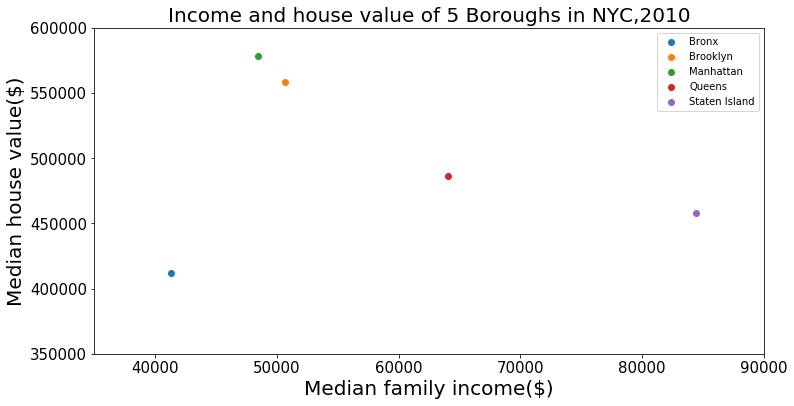

In [21]:
plt.figure(figsize = (12, 6))
plt.scatter(df3.Median_family_income[0], df3.Median_house_value[0], label = 'Bronx')
plt.scatter(df3.Median_family_income[1], df3.Median_house_value[1], label = 'Brooklyn')
plt.scatter(df3.Median_family_income[2], df3.Median_house_value[2], label = 'Manhattan')
plt.scatter(df3.Median_family_income[3], df3.Median_house_value[3], label = 'Queens')
plt.scatter(df3.Median_family_income[4], df3.Median_house_value[4], label = 'Staten Island')
plt.legend()
plt.xlim(35000,90000)
plt.ylim(350000,600000)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.xlabel('Median family income($)', fontsize = 20)
plt.ylabel('Census tract edian values of median house value for ($)', fontsize = 20)
plt.title('Income and house value of 5 Boroughs in NYC,2010', fontsize = 20)
plt.show()